In [1]:
import sys
sys.path.append( '../src')

import matplotlib.pyplot as plt
% matplotlib inline

import files as f
import pipeline as p

In [2]:
IMAGE_FILE = '../data/test3.tif'
SHAPEFILE = '../data/squares.shp'

KERNEL_SIZE = 300

In [3]:
image, src, gt = f.open_image(IMAGE_FILE)

In [4]:
grid_width, grid_height = p.gridspec(KERNEL_SIZE, src, gt)
print grid_width, grid_height
print src.RasterXSize, src.RasterYSize

17 9
5174 2704


In [5]:
squares = []
for x in range(grid_width):
    for y in range(grid_height):
        chunk = image[y*KERNEL_SIZE:y*KERNEL_SIZE+KERNEL_SIZE,x*KERNEL_SIZE:x*KERNEL_SIZE+KERNEL_SIZE]
        
        squares.append(p.find_squares(x, y, KERNEL_SIZE, chunk))

In [ ]:
squares = p.find_squares(image)

In [6]:
p.squares_to_shapefile(squares, SHAPEFILE, gt)

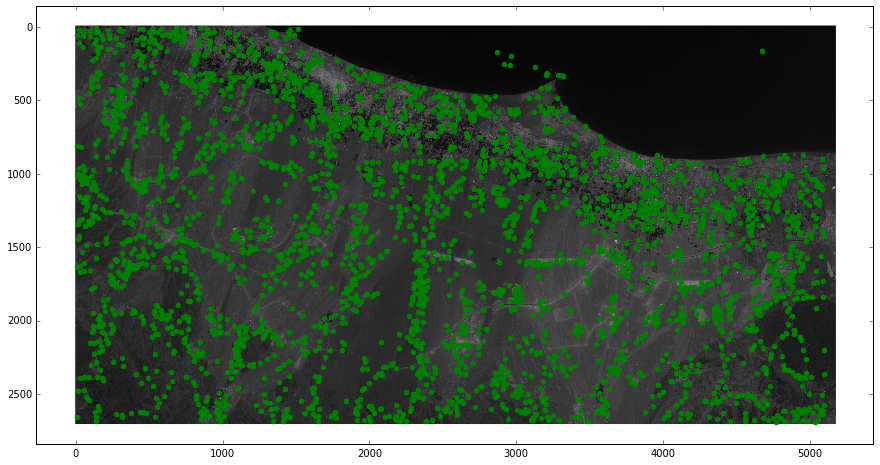

In [7]:
plt.figure(figsize=(15, 10))
plt.imshow(image, cmap='gray')

for square in squares:
    for b, centroid in square:
        plt.scatter(centroid[0], centroid[1], color='green')

plt.show()